In [1]:
%matplotlib inline
#%matplotlib widget

In [2]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
from ipywidgets import HBox, Textarea, interact
import scipy as sc
from scipy.interpolate import make_interp_spline, BSpline
from scipy.interpolate import interp1d


In [3]:
def timeToSec(timeStr):#Transform m:s format into total number of seconds
    timeArr = timeStr.split(':')
    timeMin = float(timeArr[0])
    timeSec = float(timeArr[1])
    totSec = timeMin*60+timeSec
    return totSec
def thetafit(theta,A,B):
    return A*np.sin(theta+B)
def expShift(t,A,C):
    return np.exp(A*(t))*C

[-1.28547849e+00  1.19089581e+57]


'\nv_x=df_bot.x.diff()*25#pix/sec\nv_y=df_bot.y.diff()*25#pix/sec\nv_abs=np.sqrt(v_x**2+v_y**2)\nv_x_hat=v_x/v_abs\nv_y_hat=v_y/v_abs\n'

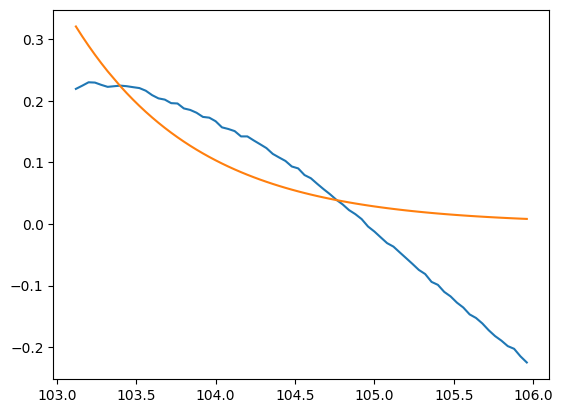

In [90]:
path_bot='D:\\Eden\\kappa_measurements_home_made_bots\\7_7_24_0_deg\\C0892.MP4_locatedFull20240624_bot_Eden_test_bot.csv'#expSum.LocatingFile
path_battery='D:\\Eden\\kappa_measurements_home_made_bots\\7_7_24_0_deg\\C0892.MP4_locatedFull20240624_bot_Eden_test_battery.csv'
startMin ='1:43'#row.start_min
endMin ='1:46'#row.end_min
start_point=timeToSec(startMin)*25#6000
end_point=timeToSec(endMin)*25#8000#frameCount
df_bot=pd.read_csv(path_bot,index_col=0)
#df=df[((df.frame<end_point)&(df.frame>=start_point))]
df_battery=pd.read_csv(path_battery,index_col=0)
count=0
evec_x_array=[]
evec_y_array=[]
frames=[]
for frame in np.arange(start_point,end_point):
    try:
        relevant_data_bot=df_bot[(df_bot.frame==frame)]
        relevant_data_battery=df_battery[(df_battery.frame==frame)]
        evec_x=(relevant_data_bot.x.iloc[0] - relevant_data_battery.x.iloc[0])
        evec_y=-(relevant_data_bot.y.iloc[0] - relevant_data_battery.y.iloc[0])
        evec_x_array.append(evec_x)
        evec_y_array.append(evec_y)
        frames.append(frame)
    except:
        continue
evec_x_array=np.array(evec_x_array)
evec_y_array=np.array(evec_y_array)
theta=np.arctan2(evec_y_array,evec_x_array)
cond=theta<0
cond=cond.astype(int)
cond=cond*2*np.pi
theta=theta+cond
results=pd.DataFrame({'frame':frames,'theta':theta})
y_plot=np.tan(theta/2)#1/np.tan(2*results.theta)#+1/np.sin(results.theta)
results=pd.DataFrame({'frame':frames,'theta':theta,'y_plot':y_plot})
valid=(np.abs(results.y_plot)<1e10)#results.y_plot.index#(np.abs(results.y_plot)<1e10)
#results = results.drop(results[(df.score < 50) & (df.score > 20)].index)
#plt.plot(results.theta,theta_V)
t=results.frame/25
#p0=np.random.randint(-10,high=10,size=2)
#print(p0)
p0=np.array([0.2,-1])
sucsses=False
count=0
#popt,pcov = sc.optimize.curve_fit(expShift,t[valid],y_plot[valid],p0=p0,maxfev=5000)

while sucsses==False:
    try:
        popt,pcov = sc.optimize.curve_fit(expShift,t[valid],y_plot[valid],p0=p0,maxfev=11000)
        sucsses=True
    except:
        print("trying again")
        p0=np.random.randint(-1,high=1,size=2)
        print(p0)
        count=count+1
        if count==10:
            break

print(popt)
y=np.exp(popt[0]*t)*popt[1]
plt.plot(t[valid],y_plot[valid])
plt.plot(t[valid],y[valid])
'''
v_x=df_bot.x.diff()*25#pix/sec
v_y=df_bot.y.diff()*25#pix/sec
v_abs=np.sqrt(v_x**2+v_y**2)
v_x_hat=v_x/v_abs
v_y_hat=v_y/v_abs
'''

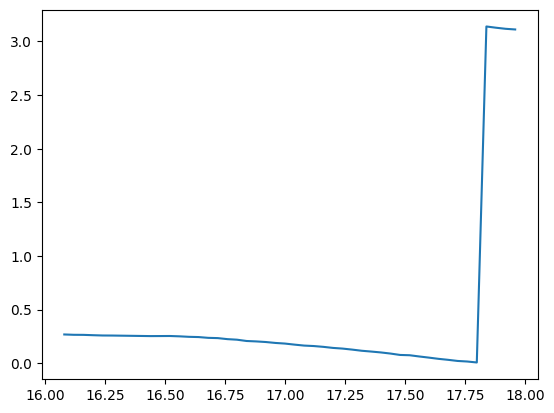

In [327]:
plt.plot(results.frame/25,results.theta/2)
#xnew=np.linspace(results.frame.min(),results.frame.max(),300)
#spl=interp1d(results.frame, results.theta, kind='cubic')
#power_smooth =spl(xnew)
#plt.plot(xnew,power_smooth)